In [1]:
#Importing necessary libraries
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

[nltk_data] Downloading package wordnet to /Users/adwait/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adwait/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_business = pd.read_json('business.json',lines=True)

In [3]:
df_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [4]:
df_business['name'].nunique()

145046

In [5]:
df_business.drop('postal_code',inplace=True,axis = 1)

In [6]:
df_business.drop('latitude',inplace=True,axis = 1)

In [7]:
df_business.drop('longitude',inplace=True,axis = 1)

In [8]:
df_business.drop('stars',inplace=True,axis = 1)

In [9]:
df_business.drop('is_open',inplace=True,axis = 1)

In [10]:
df_business.drop('attributes',inplace=True,axis = 1)

In [11]:
df_business.drop('hours',inplace=True,axis = 1)

In [12]:
df_business.head(5)

,business_id,name,address,city,state,review_count,categories
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life"
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,170,"Sushi Bars, Restaurants, Japanese"
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,3,"Insurance, Financial Services"
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,4,"Plumbing, Shopping, Local Services, Home Servi..."


In [13]:
reviews = pd.read_json('review.json',lines = True,chunksize=400000)
for r in reviews:
    review_subset = r
    break

In [14]:
df_reviews = review_subset

In [15]:
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [16]:
df_reviews.stars.unique()

array([1, 5, 4, 3, 2])

In [17]:
df_reviews.drop('review_id',inplace=True,axis = 1)

In [18]:
df_reviews.drop('user_id',inplace=True,axis = 1)

In [19]:
df_reviews.drop('useful',inplace=True,axis = 1)

In [20]:
df_reviews.drop('funny',inplace=True,axis = 1)

In [21]:
df_reviews.drop('cool',inplace=True,axis = 1)

In [22]:
#Data frame for classifying Positive,Negative reviews.
df_reviews.head()

,business_id,stars,text,date
0,ujmEBvifdJM6h6RLv4wQIg,1,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,NZnhc2sEQy3RmzKTZnqtwQ,5,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,WTqjgwHlXbSFevF32_DJVw,5,I have to say that this office really has it t...,2016-11-09 20:09:03
3,ikCg8xy5JIg_NGPx-MSIDA,5,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,b1b1eb3uo-w561D0ZfCEiQ,1,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [23]:
df_reviews['stars'].astype(str)

0         1
1         5
2         5
3         5
4         1
         ..
399995    5
399996    4
399997    4
399998    5
399999    5
Name: stars, Length: 400000, dtype: object

In [24]:
df_reviews['stars'].value_counts()

5    176594
4     88287
1     58491
3     44218
2     32410
Name: stars, dtype: int64

In [25]:
df_reviews['Label'] = df_reviews['stars'].replace({1: 0,2: 0,3:0,4:1,5:1})

In [26]:
df_reviews.head()

,business_id,stars,text,date,Label
0,ujmEBvifdJM6h6RLv4wQIg,1,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,0
1,NZnhc2sEQy3RmzKTZnqtwQ,5,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1
2,WTqjgwHlXbSFevF32_DJVw,5,I have to say that this office really has it t...,2016-11-09 20:09:03,1
3,ikCg8xy5JIg_NGPx-MSIDA,5,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,1
4,b1b1eb3uo-w561D0ZfCEiQ,1,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,0


In [27]:
df_reviews['Label'].value_counts()

1    264881
0    135119
Name: Label, dtype: int64

In [28]:
df_reviews.head()

,business_id,stars,text,date,Label
0,ujmEBvifdJM6h6RLv4wQIg,1,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,0
1,NZnhc2sEQy3RmzKTZnqtwQ,5,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1
2,WTqjgwHlXbSFevF32_DJVw,5,I have to say that this office really has it t...,2016-11-09 20:09:03,1
3,ikCg8xy5JIg_NGPx-MSIDA,5,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,1
4,b1b1eb3uo-w561D0ZfCEiQ,1,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,0


In [29]:
df_reviews.head(20)

,business_id,stars,text,date,Label
0,ujmEBvifdJM6h6RLv4wQIg,1,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,0
1,NZnhc2sEQy3RmzKTZnqtwQ,5,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1
2,WTqjgwHlXbSFevF32_DJVw,5,I have to say that this office really has it t...,2016-11-09 20:09:03,1
3,ikCg8xy5JIg_NGPx-MSIDA,5,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,1
4,b1b1eb3uo-w561D0ZfCEiQ,1,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,0
5,eU_713ec6fTGNO4BegRaww,4,I'll be the first to admit that I was not exci...,2013-01-20 13:25:59,1
6,3fw2X5bZYeW9xCz_zGhOHg,3,Tracy dessert had a big name in Hong Kong and ...,2016-05-07 01:21:02,0
7,zvO-PJCpNk4fgAVUnExYAA,1,This place has gone down hill. Clearly they h...,2010-10-05 19:12:35,0
8,b2jN2mm9Wf3RcrZCgfo1cg,2,I was really looking forward to visiting after...,2015-01-18 14:04:18,0
9,oxwGyA17NL6c5t1Etg5WgQ,3,It's a giant Best Buy with 66 registers. I do...,2012-02-29 21:52:43,0


In [30]:
df_reviews.drop('stars',inplace=True,axis = 1)

In [31]:
df_reviews.head(5)

,business_id,text,date,Label
0,ujmEBvifdJM6h6RLv4wQIg,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,0
1,NZnhc2sEQy3RmzKTZnqtwQ,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1
2,WTqjgwHlXbSFevF32_DJVw,I have to say that this office really has it t...,2016-11-09 20:09:03,1
3,ikCg8xy5JIg_NGPx-MSIDA,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,1
4,b1b1eb3uo-w561D0ZfCEiQ,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,0


In [32]:
frame = pd.merge(left = df_business,right = df_reviews,how='inner',on = 'business_id')

In [33]:
frame.head(20)

,business_id,name,address,city,state,review_count,categories,text,date,Label
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Don't go here if you expect consistent or reas...,2015-09-24 00:02:23,0
1,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Both courses are great! You can find reasonabl...,2016-04-02 03:41:15,1
2,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Absolutely gorgeous facility. Golf course was...,2015-03-27 00:21:38,1
3,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0
4,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0
5,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,0
6,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,0
7,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1
8,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","I've been a frequent at this place for years, ...",2016-08-13 20:31:21,1
9,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We chose this restaurant for our Chinese New Y...,2015-02-17 00:10:02,0


In [34]:
frame['categories'].isna().sum()

137

In [35]:
frame.dropna(inplace=True)

In [36]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399863 entries, 0 to 399999
Data columns (total 10 columns):
business_id     399863 non-null object
name            399863 non-null object
address         399863 non-null object
city            399863 non-null object
state           399863 non-null object
review_count    399863 non-null int64
categories      399863 non-null object
text            399863 non-null object
date            399863 non-null datetime64[ns]
Label           399863 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 33.6+ MB


In [37]:
frame['adwait'] =  frame['categories'].str.contains('Restaurants')

In [38]:
frame.head()

,business_id,name,address,city,state,review_count,categories,text,date,Label,adwait
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Don't go here if you expect consistent or reas...,2015-09-24 00:02:23,0,False
1,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Both courses are great! You can find reasonabl...,2016-04-02 03:41:15,1,False
2,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Absolutely gorgeous facility. Golf course was...,2015-03-27 00:21:38,1,False
3,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0,True
4,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0,True


In [39]:
frame['adwait'] = frame['adwait'].replace({False:np.nan})

In [40]:
restaurant = frame[frame['adwait'].notnull()]

In [41]:
restaurant.drop('adwait',axis = 1,inplace=True)

In [42]:
restaurant.Label.value_counts()

1    166920
0     87251
Name: Label, dtype: int64

In [43]:
restaurant.drop('business_id',axis = 1,inplace = True)

In [44]:
restaurant.reset_index()

,index,name,address,city,state,review_count,categories,text,date,Label
0,3,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0
1,4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0
2,5,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,0
3,6,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,0
4,7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1
...,...,...,...,...,...,...,...,...,...,...
254166,399971,McDonald's,1807 W Craig Rd,North Las Vegas,NV,15,"Restaurants, Coffee & Tea, Fast Food, Burgers,...",I come to this McDonalds often and typically g...,2017-10-30 17:48:42,0
254167,399972,McDonald's,1807 W Craig Rd,North Las Vegas,NV,15,"Restaurants, Coffee & Tea, Fast Food, Burgers,...",Like the fact there's a play place at this loc...,2014-11-03 21:11:56,0
254168,399973,McDonald's,1807 W Craig Rd,North Las Vegas,NV,15,"Restaurants, Coffee & Tea, Fast Food, Burgers,...","I am So Sorry for doing this...but Yep, I have...",2016-01-23 19:22:58,0
254169,399974,McDonald's,1807 W Craig Rd,North Las Vegas,NV,15,"Restaurants, Coffee & Tea, Fast Food, Burgers,...","This place might be the worst Mcdonalds ever, ...",2018-08-11 00:07:29,0


In [45]:
restaurant.columns

Index(['name', 'address', 'city', 'state', 'review_count', 'categories',
       'text', 'date', 'Label'],
      dtype='object')

In [46]:
restaurant.head(5)

,name,address,city,state,review_count,categories,text,date,Label
3,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0
4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0
5,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,0
6,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,0
7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1


In [47]:
restaurant['Label'].value_counts()

1    166920
0     87251
Name: Label, dtype: int64

In [48]:
restaurant.drop('review_count',axis = 1,inplace = True)

In [49]:
restaurant['Year'] = restaurant['date'].dt.year
restaurant['Month'] = restaurant['date'].dt.month

In [50]:
restaurant.head()

,name,address,city,state,categories,text,date,Label,Year,Month
3,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0,2017,1
4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0,2013,6
5,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,0,2016,1
6,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,0,2014,5
7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1,2011,3


In [51]:
rest1 = restaurant[restaurant['Label']==1]

In [52]:
rest2 = restaurant[restaurant['Label']==0]

In [53]:
rest1.head()

,name,address,city,state,categories,text,date,Label,Year,Month
7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1,2011,3
8,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","I've been a frequent at this place for years, ...",2016-08-13 20:31:21,1,2016,8
12,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","Because we are in Mississauga, I think this pl...",2015-08-20 03:31:45,1,2015,8
14,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",Came on a weekday morning with bf to avoid the...,2016-05-21 01:44:12,1,2016,5
16,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",The dimsum here is actually alright. Food was ...,2017-01-29 07:31:32,1,2017,1


In [54]:
df = restaurant.loc[:,['text','Label']]

In [55]:
df.head()

,text,Label
3,My girlfriend and I went for dinner at Emerald...,0
4,We've always been there on a Sunday so we were...,0
5,"***No automatic doors, not baby friendly!*** I...",0
6,"Horrible service,\nI went there tonight with m...",0
7,One of the gauges of a good Chinese restaurant...,1


In [56]:
df['clean_text'] = df['text'].apply(lambda x : ' '.join([word for word in x.split() if not word.startswith('@')]))

In [57]:
df.head()

,text,Label,clean_text
3,My girlfriend and I went for dinner at Emerald...,0,My girlfriend and I went for dinner at Emerald...
4,We've always been there on a Sunday so we were...,0,We've always been there on a Sunday so we were...
5,"***No automatic doors, not baby friendly!*** I...",0,"***No automatic doors, not baby friendly!*** I..."
6,"Horrible service,\nI went there tonight with m...",0,"Horrible service, I went there tonight with my..."
7,One of the gauges of a good Chinese restaurant...,1,One of the gauges of a good Chinese restaurant...


In [58]:
df.Label.value_counts()

1    166920
0     87251
Name: Label, dtype: int64

In [59]:
df1 = df[df['Label']==1]

In [60]:
df1

,text,Label,clean_text
7,One of the gauges of a good Chinese restaurant...,1,One of the gauges of a good Chinese restaurant...
8,"I've been a frequent at this place for years, ...",1,"I've been a frequent at this place for years, ..."
12,"Because we are in Mississauga, I think this pl...",1,"Because we are in Mississauga, I think this pl..."
14,Came on a weekday morning with bf to avoid the...,1,Came on a weekday morning with bf to avoid the...
16,The dimsum here is actually alright. Food was ...,1,The dimsum here is actually alright. Food was ...
...,...,...,...
399917,This Safeway is my go to for anything from a l...,1,This Safeway is my go to for anything from a l...
399918,One of the better Safeway around. They have a...,1,One of the better Safeway around. They have an...
399919,I love coming here for lunch. Their subs and ...,1,I love coming here for lunch. Their subs and s...
399970,I have to say this place is very busy in the m...,1,I have to say this place is very busy in the m...


In [61]:
df4 = df1.iloc[0:25000,:]
print(df4.shape)

(25000, 3)


In [62]:
df1

,text,Label,clean_text
7,One of the gauges of a good Chinese restaurant...,1,One of the gauges of a good Chinese restaurant...
8,"I've been a frequent at this place for years, ...",1,"I've been a frequent at this place for years, ..."
12,"Because we are in Mississauga, I think this pl...",1,"Because we are in Mississauga, I think this pl..."
14,Came on a weekday morning with bf to avoid the...,1,Came on a weekday morning with bf to avoid the...
16,The dimsum here is actually alright. Food was ...,1,The dimsum here is actually alright. Food was ...
...,...,...,...
399917,This Safeway is my go to for anything from a l...,1,This Safeway is my go to for anything from a l...
399918,One of the better Safeway around. They have a...,1,One of the better Safeway around. They have an...
399919,I love coming here for lunch. Their subs and ...,1,I love coming here for lunch. Their subs and s...
399970,I have to say this place is very busy in the m...,1,I have to say this place is very busy in the m...


In [63]:
df2 = df[df['Label']==0]
d = df2.iloc[0:25000,:]

In [64]:
data_frame = pd.concat([df4,d],axis = 0)

In [65]:
data_frame

,text,Label,clean_text
7,One of the gauges of a good Chinese restaurant...,1,One of the gauges of a good Chinese restaurant...
8,"I've been a frequent at this place for years, ...",1,"I've been a frequent at this place for years, ..."
12,"Because we are in Mississauga, I think this pl...",1,"Because we are in Mississauga, I think this pl..."
14,Came on a weekday morning with bf to avoid the...,1,Came on a weekday morning with bf to avoid the...
16,The dimsum here is actually alright. Food was ...,1,The dimsum here is actually alright. Food was ...
...,...,...,...
111837,I live right across the street so I come in fr...,0,I live right across the street so I come in fr...
111838,Very disappointed in this place. Maybe it is o...,0,Very disappointed in this place. Maybe it is o...
111839,Waited 15 min for water and 20min for dessert ...,0,Waited 15 min for water and 20min for dessert ...
111840,Stopped for a quick breakfast. It is a comfor...,0,Stopped for a quick breakfast. It is a comfort...


In [66]:
#Removing all the greek characters using unidecode library
data_frame['clean_text'] = data_frame['clean_text'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 

In [67]:
data_frame

,text,Label,clean_text
7,One of the gauges of a good Chinese restaurant...,1,One of the gauges of a good Chinese restaurant...
8,"I've been a frequent at this place for years, ...",1,"I've been a frequent at this place for years, ..."
12,"Because we are in Mississauga, I think this pl...",1,"Because we are in Mississauga, I think this pl..."
14,Came on a weekday morning with bf to avoid the...,1,Came on a weekday morning with bf to avoid the...
16,The dimsum here is actually alright. Food was ...,1,The dimsum here is actually alright. Food was ...
...,...,...,...
111837,I live right across the street so I come in fr...,0,I live right across the street so I come in fr...
111838,Very disappointed in this place. Maybe it is o...,0,Very disappointed in this place. Maybe it is o...
111839,Waited 15 min for water and 20min for dessert ...,0,Waited 15 min for water and 20min for dessert ...
111840,Stopped for a quick breakfast. It is a comfor...,0,Stopped for a quick breakfast. It is a comfort...


In [68]:
df = data_frame

In [69]:
#Shuffling the data
df = df.sample(frac=1).reset_index(drop=True)

In [70]:
df

,text,Label,clean_text
0,This place is a total hit or miss - Sometimes ...,0,This place is a total hit or miss - Sometimes ...
1,"Ciao Roma,\n\nIt's my pleasure to meet you (Re...",1,"Ciao Roma, It's my pleasure to meet you (Recta..."
2,There were six of us who went just after the l...,0,There were six of us who went just after the l...
3,I agree - this was just ok.\n\nHad the homemad...,0,I agree - this was just ok. Had the homemade m...
4,We went on a Sunday about noon for the first t...,0,We went on a Sunday about noon for the first t...
...,...,...,...
49995,Great food! Best lettuce wraps I have ever had...,1,Great food! Best lettuce wraps I have ever had...
49996,"My review is for lunch, not dinner, so I suppo...",0,"My review is for lunch, not dinner, so I suppo..."
49997,Went in around 12 or 1 on a Saturday and order...,0,Went in around 12 or 1 on a Saturday and order...
49998,"Best buffet, great food, warm service, lots of...",1,"Best buffet, great food, warm service, lots of..."


In [71]:
#Taking care of slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food','njoy':'enjoy!'} ## Need a huge dictionary
df['clean_text'] = df['clean_text'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [72]:
#Tokenization and removing stopwords
#Removing all numbers, punctutations,greeks
#Just keeping the reviews.
corpus = []
ps = PorterStemmer()
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z]", " ")
for i in range(0,50000):
    tweet = df['clean_text'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [73]:
corpus1 = pd.DataFrame(corpus,columns=['review'])

In [74]:
corpus1.head()

,review
0,place total hit miss sometim yummi sometim lik...
1,ciao roma pleasur meet rectangular pizza memor...
2,six us went lunch crowd first impress place co...
3,agre ok homemad mozz app w arugula tasti bette...
4,went sunday noon first time nice welcom atmosp...


In [75]:
df = pd.concat([df,corpus1],axis = 1)

In [76]:
df.head()

,text,Label,clean_text,review
0,This place is a total hit or miss - Sometimes ...,0,This place is a total hit or miss Sometimes ...,place total hit miss sometim yummi sometim lik...
1,"Ciao Roma,\n\nIt's my pleasure to meet you (Re...",1,Ciao Roma It s my pleasure to meet you Recta...,ciao roma pleasur meet rectangular pizza memor...
2,There were six of us who went just after the l...,0,There were six of us who went just after the l...,six us went lunch crowd first impress place co...
3,I agree - this was just ok.\n\nHad the homemad...,0,I agree this was just ok Had the homemade m...,agre ok homemad mozz app w arugula tasti bette...
4,We went on a Sunday about noon for the first t...,0,We went on a Sunday about noon for the first t...,went sunday noon first time nice welcom atmosp...


In [77]:
#Finding words with # attached to it
df['hash1'] = df['review'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [83]:
df.head()

,text,Label,clean_text,review,hash1
0,"Since getting a job, nearby, I've eaten at Tot...",1,Since getting a job nearby I ve eaten at Tot...,sinc get job nearbi eaten tott hand time minut...,
1,Not so great for brunch. Service is slow--and ...,0,Not so great for brunch Service is slow and ...,great brunch servic slow unlimit champagn neve...,
2,I stopped in here while waiting for my colleag...,0,I stopped in here while waiting for my colleag...,stop wait colleagu drop car servic smell god f...,
3,"Sushi is okay, but overpriced for what is esse...",0,Sushi is okay but overpriced for what is esse...,sushi okay overpr essenti self servic place se...,
4,I was sitting around getting ready to order a ...,1,I was sitting around getting ready to order a ...,sit around get readi order pizza receiv call b...,


In [84]:
x = df['hash1']
x = pd.DataFrame(x)
x[x['hash1'] == ''] = 'No hashtags'

In [85]:
x.hash1.value_counts()

No hashtags               49558
#                           275
# #                          50
# # #                        19
# # # #                       7
                          ...  
#shopsmal #shoploc            1
#firstworldproblem            1
#thumbsdown                   1
#foodiefridayfind #win        1
#yourewelcom                  1
Name: hash1, Length: 87, dtype: int64

In [86]:
type(x)
x = x.rename({'hash1':'Hashed_words'},axis = 'columns')

In [87]:
df = pd.concat([df,x],axis = 1)

In [88]:
df

,text,Label,clean_text,review,hash1,Hashed_words
0,"Since getting a job, nearby, I've eaten at Tot...",1,Since getting a job nearby I ve eaten at Tot...,sinc get job nearbi eaten tott hand time minut...,,No hashtags
1,Not so great for brunch. Service is slow--and ...,0,Not so great for brunch Service is slow and ...,great brunch servic slow unlimit champagn neve...,,No hashtags
2,I stopped in here while waiting for my colleag...,0,I stopped in here while waiting for my colleag...,stop wait colleagu drop car servic smell god f...,,No hashtags
3,"Sushi is okay, but overpriced for what is esse...",0,Sushi is okay but overpriced for what is esse...,sushi okay overpr essenti self servic place se...,,No hashtags
4,I was sitting around getting ready to order a ...,1,I was sitting around getting ready to order a ...,sit around get readi order pizza receiv call b...,,No hashtags
...,...,...,...,...,...,...
49995,Our favorite hibachi place in the whole area. ...,1,Our favorite hibachi place in the whole area ...,favorit hibachi place whole area excel servic ...,,No hashtags
49996,"Not going to lie, this place is going downhill...",0,Not going to lie this place is going downhill...,go lie place go downhil sinc start come year a...,,No hashtags
49997,Just moved to the area and since we hadn't rea...,0,Just moved to the area and since we hadn t rea...,move area sinc realli unpack kitchen groceri s...,,No hashtags
49998,Fully enjoyed my in house made pistachio ice-c...,1,Fully enjoyed my in house made pistachio ice c...,fulli enjoy hous made pistachio ice cream waff...,,No hashtags


In [89]:
hash_positive = []
hash_negative = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [90]:
# extracting hashtags from positive reviews
hash_negative = hashtag_extract(df['clean_text'][df['Label'] == 0])

# extracting hashtags from negative reviews
hash_positive = hashtag_extract(df['clean_text'][df['Label'] == 1])

# Converting a multidimensional list to a 1-D list
hash_positive = sum(hash_positive,[])
hash_negative = sum(hash_negative,[])

#Change this dumbo

In [91]:
from collections import Counter

In [92]:
pos = Counter(hash_positive)
neg = Counter(hash_negative)

In [93]:
pos

Counter({'Ro': 1,
         'PCF': 1,
         'Z': 1,
         'LPuuDavpDeZE': 1,
         'yourewelcome': 1,
         'Tc': 1,
         'SAuXcPnQ': 1,
         'AZl': 1,
         'fLYO': 1,
         'vinosquared': 1,
         'vino': 1,
         'buylocal': 1,
         'eatclean': 1,
         'B': 1,
         'fatkidstatus': 1,
         'XYZ': 1,
         'totts': 1,
         'foodinlasvegas': 1,
         'Mtlatable': 1,
         'win': 2,
         'griffintown': 1,
         'ShopSmall': 1,
         'ShopLocal': 1,
         'soyfreefriendly': 2,
         'Winning': 2,
         'notypo': 1,
         'YEG': 1,
         'ing': 1,
         'ComeGetServed': 1,
         'YouDeserveToBeServed': 1,
         'c': 1,
         'zerotohero': 1,
         'underpromiseoverdeliver': 1,
         'richclub': 1,
         'mansiononmywrist': 1,
         'donatingtolocalchurches': 1,
         'blessed': 1,
         'BOLT': 1,
         'chinese': 1,
         'noodle': 1,
         'soup': 1,
         'NV':

In [94]:
neg

Counter({'no': 2,
         'hrid': 2,
         'S': 1,
         'vinosquared': 2,
         'vino': 4,
         'ck': 1,
         'unacceptable': 1,
         'Vinosquared': 1,
         'puck': 1,
         'displeased': 1,
         'dontcallyourselvesasportsbarthen': 1,
         'chickfila': 1,
         'lasvegas': 1,
         'marketBENITEZ': 1,
         'ThumbsDown': 1,
         'P': 1,
         'iwantagrownupsundae': 1,
         'dontbetightwads': 1,
         'unsatisfiedcustomer': 1,
         'MomOfTheYear': 1,
         'smh': 1,
         'placesucksgolfballs': 1,
         'toolittlesauce': 1,
         'Yuck': 1,
         'ked': 1,
         'sadnoodles': 1,
         'paythepriceforsteamedrice': 1,
         'GROSS': 1,
         'HeavyHanded': 1,
         'SecurityFail': 1,
         'map': 1,
         'n': 1,
         'fail': 1,
         'updateyourmenu': 1,
         'LQ': 1,
         'CXV': 1,
         'J': 1,
         'iiKKb': 1,
         'FAIL': 1,
         'in': 1,
         'h': 1,

In [95]:
positive = ['ComeGetServed','ilovewingking','spicynoodlechallenge','ilovevegas','vegasdining','vegasfood','weekendinvegas','foodinlasvegas','BestofLasVegas','BurgerLover']

In [96]:
negative = ['Yuck','chickfila','FAIL','displeased','disappointed','toolittlesauce','FoodPoisoning','unacceptable','ThumbsDown','sadnoodles']

Normal words


(-0.5, 799.5, 499.5, -0.5)

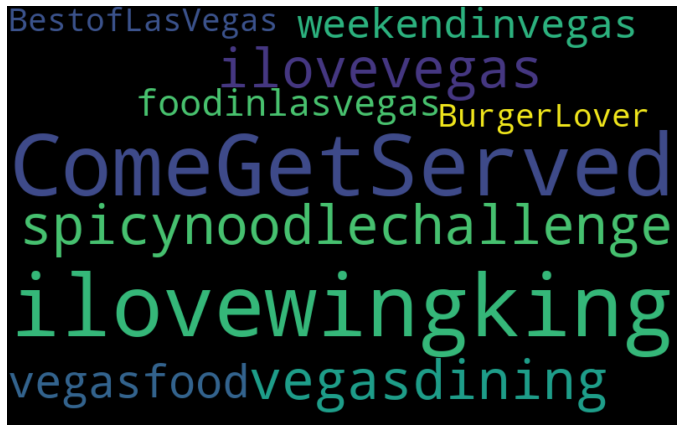

In [97]:
#Positive hash tagged words
#Words related to vegas have lot of positive reviews.Hence it can be said that restaurants in vegas are pretty good.
normal_words = ' '.join(positive)
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

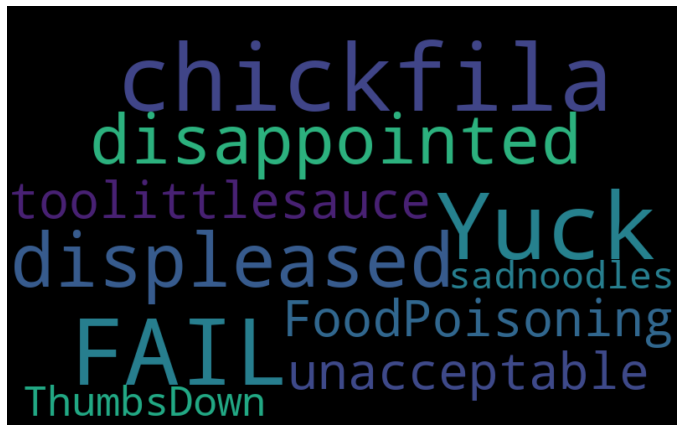

In [98]:
#Negative hash tagged words
normal_words = ' '.join(negative)
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [78]:
df.head(10)

,text,Label,clean_text,review,hash1
0,This place is a total hit or miss - Sometimes ...,0,This place is a total hit or miss Sometimes ...,place total hit miss sometim yummi sometim lik...,
1,"Ciao Roma,\n\nIt's my pleasure to meet you (Re...",1,Ciao Roma It s my pleasure to meet you Recta...,ciao roma pleasur meet rectangular pizza memor...,
2,There were six of us who went just after the l...,0,There were six of us who went just after the l...,six us went lunch crowd first impress place co...,
3,I agree - this was just ok.\n\nHad the homemad...,0,I agree this was just ok Had the homemade m...,agre ok homemad mozz app w arugula tasti bette...,
4,We went on a Sunday about noon for the first t...,0,We went on a Sunday about noon for the first t...,went sunday noon first time nice welcom atmosp...,
5,Employee behind counter not very pleasant most...,0,Employee behind counter not very pleasant most...,employe behind counter pleasant time chang glo...,
6,Most authentic Vietnamese food around the UNLV...,1,Most authentic Vietnamese food around the UNLV...,authent vietnames food around unlv area food p...,
7,"Best bagels, bialys and potato pancakes! We've...",1,Best bagels bialys and potato pancakes We ve...,best bagel biali potato pancak live valley yea...,
8,The hubbie and son are wingholics and this is ...,0,The hubbie and son are wingholics and this is ...,hubbi son winghol favorit place wing say new y...,
9,My friend was staying at a fancy schmancy hote...,1,My friend was staying at a fancy schmancy hote...,friend stay fanci schmanci hotel north scottsd...,


In [79]:
df.drop('hash1',axis = 1,inplace=True)
df.drop('clean_text',axis = 1,inplace=True)

In [80]:
#review columns is the cleaned text
df.head()

,text,Label,review
0,This place is a total hit or miss - Sometimes ...,0,place total hit miss sometim yummi sometim lik...
1,"Ciao Roma,\n\nIt's my pleasure to meet you (Re...",1,ciao roma pleasur meet rectangular pizza memor...
2,There were six of us who went just after the l...,0,six us went lunch crowd first impress place co...
3,I agree - this was just ok.\n\nHad the homemad...,0,agre ok homemad mozz app w arugula tasti bette...
4,We went on a Sunday about noon for the first t...,0,went sunday noon first time nice welcom atmosp...


In [82]:
print(restaurant.shape)
restaurant.head()

(254171, 10)


,name,address,city,state,categories,text,date,Label,Year,Month
3,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0,2017,1
4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0,2013,6
5,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,0,2016,1
6,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,0,2014,5
7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1,2011,3


In [83]:
print(df.shape)
df.head()

(50000, 3)


,text,Label,review
0,The menu has a great variety & dishes are well...,0,menu great varieti dish well execut everyth pr...
1,Always great deals. Whenever we bring our chil...,1,alway great deal whenev bring children automat...
2,Great food! Everything was homemade and delici...,1,great food everyth homemad delici love pita br...
3,Had dinner there tonight. The food was fine. N...,0,dinner tonight food fine particularli distingu...
4,Get the pork - it's free range/organic or some...,1,get pork free rang organ someth littl mall pla...


In [81]:
corpus

['place total hit miss sometim yummi sometim like right away get pickl cole slaw fri never consist sometim crinkl cut time regular cut sometim grill sandwich grill togeth other time grill seper put togeth weird one time crust grill sandwich grill opposit eachoth dark crust side dark crust side lighter crust side call crazi realli bother cooki made certain day sometim soft sometim hard need consist peopl servic never good think becom accostum except ladi work cash regist alway smile one els seem like smile close work eat never know happi hey live vega everyth gambl',
 'ciao roma pleasur meet rectangular pizza memori take way back high school day wild parti pizza rememb plain pepperoni chees squar back flour ish crunchi sinc time rome al taglio attitud breath fresh ingredi air longer satisfi mainstream n ingredi select instead search authent italian ingredi brand premium price product match oversea lifestyl light healthi one label none ask server pizza choic longer deep see glimps fast f

In [84]:
#TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,stop_words='english')
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus).toarray()
Y1 = df.loc[:,'Label'].values

In [82]:
#1 - RandomForest classification with Pipeline (TF-IDF approach)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(df['review'], df['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=df['Label'])
#Training and testing the randomforest model
rf = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(X1_train, Y1_train)
y_pred = rf.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))

Predicted     0     1
Actual               
0          6397  1103
1          2119  5381
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      7500
           1       0.83      0.72      0.77      7500

    accuracy                           0.79     15000
   macro avg       0.79      0.79      0.78     15000
weighted avg       0.79      0.79      0.78     15000



In [83]:
#TF-IDF after removing everything from the reviews but for the words
#2 - SVM using pipelines
#Model building on approach 2
#Removing everything but for words from the reviews
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=df['Label'])
vectorizer = TfidfVectorizer()
#X2_train_vect = vectorizer.fit_transform(X2_train)
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6491 1009]
 [1022 6478]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7500
           1       0.87      0.86      0.86      7500

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [84]:
#1 - RandomForest classification with Pipeline (BOW approach)
from sklearn.feature_extraction.text import CountVectorizer  
X1_train, X1_test, Y1_train, Y1_test = train_test_split(df['review'], df['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=df['Label'])
#Training and testing the randomforest model
rf = Pipeline([('count', CountVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(X1_train, Y1_train)
y_pred = rf.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))

Predicted     0     1
Actual               
0          6388  1112
1          2142  5358
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      7500
           1       0.83      0.71      0.77      7500

    accuracy                           0.78     15000
   macro avg       0.79      0.78      0.78     15000
weighted avg       0.79      0.78      0.78     15000



In [85]:
#2 - SVM using pipelines (BOW approach)
from sklearn.feature_extraction.text import CountVectorizer  
X1_train, X1_test, Y1_train, Y1_test = train_test_split(df['review'], df['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=df['Label'])
clf = Pipeline([('count', CountVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf.fit(X1_train, Y1_train)
y_pred = clf.predict(X1_test)
print(confusion_matrix(Y1_test, y_pred))
print(classification_report(Y1_test, y_pred))

[[6394 1106]
 [ 892 6608]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7500
           1       0.86      0.88      0.87      7500

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [117]:
reviews = pd.read_json('review.json',lines = True,chunksize=400000)
for r in reviews:
    review_subset = r
    break

In [118]:
#Now using a dataframe to classify whether a review was Positive,Negative or Neutral
new_df = review_subset
new_df.head()
new_df.drop('review_id',axis = 1,inplace = True)
new_df.drop('user_id',axis = 1,inplace = True)
new_df.drop('useful',axis = 1,inplace = True)
new_df.drop('funny',axis = 1,inplace = True)
new_df.drop('cool',axis = 1,inplace = True)

In [119]:
new_df['Label'] = new_df['stars'].replace({1:-1,2:-1,3:0,4:1,5:1})

In [120]:
new_df.head()
new_df['Label'].value_counts()

 1    264881
-1     90901
 0     44218
Name: Label, dtype: int64

In [121]:
new_df.drop('stars',inplace=True,axis = 1)

In [122]:
new_df.head()

,business_id,text,date,Label
0,ujmEBvifdJM6h6RLv4wQIg,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,-1
1,NZnhc2sEQy3RmzKTZnqtwQ,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1
2,WTqjgwHlXbSFevF32_DJVw,I have to say that this office really has it t...,2016-11-09 20:09:03,1
3,ikCg8xy5JIg_NGPx-MSIDA,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,1
4,b1b1eb3uo-w561D0ZfCEiQ,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,-1


In [123]:
new_frame = pd.merge(left = df_business,right = new_df,how='inner',on = 'business_id')

In [124]:
new_frame.head()

,business_id,name,address,city,state,review_count,categories,text,date,Label
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Don't go here if you expect consistent or reas...,2015-09-24 00:02:23,-1
1,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Both courses are great! You can find reasonabl...,2016-04-02 03:41:15,1
2,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,5,"Golf, Active Life",Absolutely gorgeous facility. Golf course was...,2015-03-27 00:21:38,1
3,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0
4,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0


In [125]:
new_frame.dropna(inplace=True)

In [126]:
new_frame['toro'] =  new_frame['categories'].str.contains('Restaurants')

In [127]:
new_frame['toro'] = new_frame['toro'].replace({False:np.nan})
new_restaurant = new_frame[new_frame['toro'].notnull()]
new_restaurant.drop('toro',axis = 1,inplace=True)
new_restaurant.Label.value_counts()

 1    166920
-1     53079
 0     34172
Name: Label, dtype: int64

In [128]:
new_restaurant.drop('business_id',axis = 1,inplace = True)
new_restaurant.reset_index()
new_restaurant.columns
new_restaurant.head(5)

,name,address,city,state,review_count,categories,text,date,Label
3,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0
4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0
5,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,0
6,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,-1
7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1


In [129]:
new_restaurant['Year'] = new_restaurant['date'].dt.year
new_restaurant['Month'] = new_restaurant['date'].dt.month
new_restaurant.head(5)

,name,address,city,state,review_count,categories,text,date,Label,Year,Month
3,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0,2017,1
4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0,2013,6
5,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,0,2016,1
6,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...","Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,-1,2014,5
7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,128,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1,2011,3


In [130]:
adwait = new_restaurant.loc[:,['text','Label']]
adwait.head()
adwait['clean_text'] = adwait['text'].apply(lambda x : ' '.join([word for word in x.split() if not word.startswith('@')]))

In [131]:
adwait.head()
adwait.Label.value_counts()

 1    166920
-1     53079
 0     34172
Name: Label, dtype: int64

In [132]:
a = adwait[adwait['Label']==-1]
A = a.iloc[0:15000,:]
print(A.shape)
b = adwait[adwait['Label']==0]
B = b.iloc[0:15000,:]
print(B.shape)
c = adwait[adwait['Label']==1]
C = c.iloc[0:15000,:]
print(C.shape)
toro = pd.concat([A,B,C],axis = 0)
toro.head()

(15000, 3)
(15000, 3)
(15000, 3)


,text,Label,clean_text
6,"Horrible service,\nI went there tonight with m...",-1,"Horrible service, I went there tonight with my..."
10,I went at 230 on a Monday. It was dimsum \n\nI...,-1,I went at 230 on a Monday. It was dimsum I hat...
15,"Despite the poor service here, my family comes...",-1,"Despite the poor service here, my family comes..."
21,"Poor service, overpriced food. Make sure to c...",-1,"Poor service, overpriced food. Make sure to ch..."
22,This is the second time I've ever been here an...,-1,This is the second time I've ever been here an...


In [133]:
toro = toro.sample(frac=1).reset_index(drop=True)
toro.head()
toro.Label.value_counts()

-1    15000
 1    15000
 0    15000
Name: Label, dtype: int64

In [134]:
toro['clean_text'] = toro['clean_text'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 

In [104]:
#Taking care of slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food','njoy':'enjoy!'} ## Need a huge dictionary
toro['clean_text'] = toro['clean_text'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

#Keeping reviews,numbers,punctuations and hashtags
#Tokenization and removing stopwords
corp = []
ps = PorterStemmer()
for i in range(0,45000):
    tweet = toro['clean_text'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corp.append(tweet)

corp1 = pd.DataFrame(corp,columns=['review'])


In [105]:
corp1.head()

,review
0,call- super friendli serivc delivery- arriv wi...
1,"frida' margaritas. 'nough said. that, there' r..."
2,enjoy fact restaur local own kind famili inter...
3,food good servic realli slow! visit went 1:00 ...
4,enjoy averag noodl dish place you. went think ...


In [106]:
toro.head()

,text,Label,clean_text
0,The Call- Super friendly serivce\nDelivery- Ar...,-1,The Call- Super friendly serivce Delivery- Arr...
1,They have Frida's margaritas. 'nough said. Oth...,-1,They have Frida's margaritas. 'nough said. Oth...
2,I enjoyed the fact that this restaurant is loc...,0,I enjoyed the fact that this restaurant is loc...
3,Their food is good but service can be really s...,0,Their food is good but service can be really s...
4,If you enjoy below average noodle dishes this ...,-1,If you enjoy below average noodle dishes this ...


In [107]:
toro = pd.concat([toro,corp1],axis = 1)

In [108]:
toro.Label.value_counts()

-1    15000
 1    15000
 0    15000
Name: Label, dtype: int64

In [109]:
toro.head(4)

,text,Label,clean_text,review
0,The Call- Super friendly serivce\nDelivery- Ar...,-1,The Call- Super friendly serivce Delivery- Arr...,call- super friendli serivc delivery- arriv wi...
1,They have Frida's margaritas. 'nough said. Oth...,-1,They have Frida's margaritas. 'nough said. Oth...,"frida' margaritas. 'nough said. that, there' r..."
2,I enjoyed the fact that this restaurant is loc...,0,I enjoyed the fact that this restaurant is loc...,enjoy fact restaur local own kind famili inter...
3,Their food is good but service can be really s...,0,Their food is good but service can be really s...,food good servic realli slow! visit went 1:00 ...


In [124]:
#Model building on approach 2
#Keeping reviews,numbers,punctuations and hashtags
#RandomForest classification with Pipeline
X2_train, X2_test, Y2_train, Y2_test = train_test_split(toro['review'], toro['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=toro['Label'])
vectorizer = TfidfVectorizer()
#X2_train_vect = vectorizer.fit_transform(X2_train)

In [110]:
#Training and testing the randomforest model - TF-IDF approach
X2_train, X2_test, Y2_train, Y2_test = train_test_split(toro['review'], toro['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=toro['Label'])
rf1 = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf1.fit(X2_train, Y2_train)
y_pred = rf1.predict(X2_test)
print(pd.crosstab(Y2_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y2_test, y_pred))

Predicted    -1     0     1
Actual                     
-1         3200   936   364
 0         1346  2185   969
 1          584  1014  2902
              precision    recall  f1-score   support

          -1       0.62      0.71      0.66      4500
           0       0.53      0.49      0.51      4500
           1       0.69      0.64      0.66      4500

    accuracy                           0.61     13500
   macro avg       0.61      0.61      0.61     13500
weighted avg       0.61      0.61      0.61     13500



In [112]:
#2 - SVM using pipelines - TF-IDF approach
#Model building on approach 2
X_train, X_test, y_train, y_test = train_test_split(toro['review'], toro['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=toro['Label'])
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3326 1055  119]
 [ 735 3193  572]
 [ 165  970 3365]]
              precision    recall  f1-score   support

          -1       0.79      0.74      0.76      4500
           0       0.61      0.71      0.66      4500
           1       0.83      0.75      0.79      4500

    accuracy                           0.73     13500
   macro avg       0.74      0.73      0.74     13500
weighted avg       0.74      0.73      0.74     13500



In [113]:
#Training and testing the randomforest model - BOW approach
X2_train, X2_test, Y2_train, Y2_test = train_test_split(toro['review'], toro['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=toro['Label'])
rf1 = Pipeline([('count', CountVectorizer()), ('rf', RandomForestClassifier())])
rf1.fit(X2_train, Y2_train)
y_pred = rf1.predict(X2_test)
print(pd.crosstab(Y2_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y2_test, y_pred))

Predicted    -1     0     1
Actual                     
-1         3220   891   389
 0         1365  2111  1024
 1          525   947  3028
              precision    recall  f1-score   support

          -1       0.63      0.72      0.67      4500
           0       0.53      0.47      0.50      4500
           1       0.68      0.67      0.68      4500

    accuracy                           0.62     13500
   macro avg       0.62      0.62      0.62     13500
weighted avg       0.62      0.62      0.62     13500



In [114]:
#2 - SVM using pipelines - BOW approach
#Model building on approach 2
X_train, X_test, y_train, y_test = train_test_split(toro['review'], toro['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=toro['Label'])
clf = Pipeline([('count', CountVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3434  918  148]
 [ 838 2865  797]
 [ 153  621 3726]]
              precision    recall  f1-score   support

          -1       0.78      0.76      0.77      4500
           0       0.65      0.64      0.64      4500
           1       0.80      0.83      0.81      4500

    accuracy                           0.74     13500
   macro avg       0.74      0.74      0.74     13500
weighted avg       0.74      0.74      0.74     13500



In [135]:
toro.head()

,text,Label,clean_text
0,We went to the new location last night to cele...,-1,We went to the new location last night to cele...
1,This pizza was so salty and gross. We ordered ...,-1,This pizza was so salty and gross. We ordered ...
2,I give this 2.5 stars. The food we ordered...f...,-1,I give this 2.5 stars. The food we ordered...f...
3,Went to Parallax for Valentine's dinner. There...,1,Went to Parallax for Valentine's dinner. There...
4,"Came here for a friend's birthday dinner, had ...",-1,"Came here for a friend's birthday dinner, had ..."


In [136]:
#Taking care of slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food','njoy':'enjoy!'} ## Need a huge dictionary
toro['clean_text'] = toro['clean_text'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

#Keeping reviews,numbers,punctuations and hashtags
#Tokenization and removing stopwords
corps = []
ps = PorterStemmer()
for i in range(0,45000):
    tweet = re.sub('[^a-zA-Z]',' ',toro['clean_text'][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corps.append(tweet)

In [137]:
corps

['went new locat last night celebr daughter th birthday met rude servic hostess parti advis seat major parti daughter wait rd person show ask seat sinc major parti hostess told us need least one person arriv explain wait elderli parent arriv gotten lost would moment want sit order drink wait monday night restaur less half full ignor request partner follow insist seat final agre seat us gave us eye roll dirti look daughter birthday would left waiter friendli food good award win good like atmospher honestli bad feel encount hostess think return mani great restaur central phoenix welcom friendli return one care custom',
 'pizza salti gross order thin pepperoni sausag pan broccoli spinach pizza salti uneat pan pizza burnt bottom sadli carryout could easili return end throw away order hotel diner disappoint',
 'give star food order french onion soup mac chees without chile onion ring excit asid possibl onion ring slightli waiter nice price support qualiti meal perhap mistak order food mainl

In [143]:
corp2 = pd.DataFrame(corps,columns=['review'])
toro = pd.concat([toro,corp2],axis = 1)

In [144]:
toro.head()

,text,Label,clean_text,review
0,We went to the new location last night to cele...,-1,We went to the new location last night to cele...,went new locat last night celebr daughter th b...
1,This pizza was so salty and gross. We ordered ...,-1,This pizza was so salty and gross. We ordered ...,pizza salti gross order thin pepperoni sausag ...
2,I give this 2.5 stars. The food we ordered...f...,-1,I give this 2.5 stars. The food we ordered...f...,give star food order french onion soup mac che...
3,Went to Parallax for Valentine's dinner. There...,1,Went to Parallax for Valentine's dinner. There...,went parallax valentin dinner nice three cours...
4,"Came here for a friend's birthday dinner, had ...",-1,"Came here for a friend's birthday dinner, had ...",came friend birthday dinner look menu beforeha...


In [145]:
#Training and testing the randomforest model - TF-IDF approach
X2_train, X2_test, Y2_train, Y2_test = train_test_split(toro['review'], toro['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=toro['Label'])
rf1 = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf1.fit(X2_train, Y2_train)
y_pred = rf1.predict(X2_test)
print(pd.crosstab(Y2_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y2_test, y_pred))

Predicted    -1     0     1
Actual                     
-1         3132  1010   358
 0         1390  2243   867
 1          550  1003  2947
              precision    recall  f1-score   support

          -1       0.62      0.70      0.65      4500
           0       0.53      0.50      0.51      4500
           1       0.71      0.65      0.68      4500

    accuracy                           0.62     13500
   macro avg       0.62      0.62      0.62     13500
weighted avg       0.62      0.62      0.62     13500



In [146]:
#2 - SVM using pipelines - TF-IDF approach
#Model building on approach 2
X_train, X_test, y_train, y_test = train_test_split(toro['review'], toro['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=toro['Label'])
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3400  985  115]
 [ 787 3146  567]
 [ 145  823 3532]]
              precision    recall  f1-score   support

          -1       0.78      0.76      0.77      4500
           0       0.64      0.70      0.67      4500
           1       0.84      0.78      0.81      4500

    accuracy                           0.75     13500
   macro avg       0.75      0.75      0.75     13500
weighted avg       0.75      0.75      0.75     13500



In [147]:
#Training and testing the randomforest model - BOW approach
X2_train, X2_test, Y2_train, Y2_test = train_test_split(toro['review'], toro['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=toro['Label'])
rf1 = Pipeline([('count', CountVectorizer()), ('rf', RandomForestClassifier())])
rf1.fit(X2_train, Y2_train)
y_pred = rf1.predict(X2_test)
print(pd.crosstab(Y2_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y2_test, y_pred))

Predicted    -1     0     1
Actual                     
-1         3176   959   365
 0         1412  2132   956
 1          552   988  2960
              precision    recall  f1-score   support

          -1       0.62      0.71      0.66      4500
           0       0.52      0.47      0.50      4500
           1       0.69      0.66      0.67      4500

    accuracy                           0.61     13500
   macro avg       0.61      0.61      0.61     13500
weighted avg       0.61      0.61      0.61     13500



In [148]:
#2 - SVM using pipelines - BOW approach
#Model building on approach 2
X_train, X_test, y_train, y_test = train_test_split(toro['review'], toro['Label'], test_size = 0.3, random_state=0, shuffle = True, stratify=toro['Label'])
clf = Pipeline([('count', CountVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3482  877  141]
 [ 926 2820  754]
 [ 138  577 3785]]
              precision    recall  f1-score   support

          -1       0.77      0.77      0.77      4500
           0       0.66      0.63      0.64      4500
           1       0.81      0.84      0.82      4500

    accuracy                           0.75     13500
   macro avg       0.74      0.75      0.75     13500
weighted avg       0.74      0.75      0.75     13500



In [126]:
restaurant.head()

,name,address,city,state,categories,text,date,Label,Year,Month
3,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,0,2017,1
4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",We've always been there on a Sunday so we were...,2013-06-24 23:11:30,0,2013,6
5,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,0,2016,1
6,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,0,2014,5
7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1,2011,3


In [127]:
#Splitting the datetime column to extract date from the column for time series plot
restaurant['Day'] = pd.to_datetime(restaurant['date']).dt.date

In [128]:
r_negative = restaurant[restaurant['Label']==0]

In [129]:
r_positive = restaurant[restaurant['Label']==1]

In [130]:
r_positive = pd.DataFrame(r_positive)
r_negative = pd.DataFrame(r_negative)
r_positive.head()

,name,address,city,state,categories,text,date,Label,Year,Month,Day
7,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,1,2011,3,2011-03-21
8,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","I've been a frequent at this place for years, ...",2016-08-13 20:31:21,1,2016,8,2016-08-13
12,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...","Because we are in Mississauga, I think this pl...",2015-08-20 03:31:45,1,2015,8,2015-08-20
14,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",Came on a weekday morning with bf to avoid the...,2016-05-21 01:44:12,1,2016,5,2016-05-21
16,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,"Specialty Food, Restaurants, Dim Sum, Imported...",The dimsum here is actually alright. Food was ...,2017-01-29 07:31:32,1,2017,1,2017-01-29


In [131]:
p = r_positive.groupby('Day')
rp = p.count()
rp.reset_index(inplace = True)

In [132]:
rp.head()

,Day,name,address,city,state,categories,text,date,Label,Year,Month
0,2005-04-22,1,1,1,1,1,1,1,1,1,1
1,2005-04-27,2,2,2,2,2,2,2,2,2,2
2,2005-05-09,1,1,1,1,1,1,1,1,1,1
3,2005-05-14,1,1,1,1,1,1,1,1,1,1
4,2005-05-15,1,1,1,1,1,1,1,1,1,1


In [133]:
n = r_negative.groupby('Day')
rn = n.count()
rn.reset_index(inplace = True)

In [134]:
rn.head()

,Day,name,address,city,state,categories,text,date,Label,Year,Month
0,2004-12-19,1,1,1,1,1,1,1,1,1,1
1,2005-05-26,2,2,2,2,2,2,2,2,2,2
2,2005-10-03,1,1,1,1,1,1,1,1,1,1
3,2005-11-01,1,1,1,1,1,1,1,1,1,1
4,2005-11-03,1,1,1,1,1,1,1,1,1,1


In [137]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=rp.Day, y=rp['Label'], name="Positive",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=rn.Day, y=rn['Label'], name="Negative",
                         line_color='dimgray'))

fig.update_layout(title_text='Time Series of Positive and Negative reviews, Year by Year',
                  xaxis_rangeslider_visible=True)
fig.show()